In [3]:
!pip install raster2xyz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install rasterio
!pip install pandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Convert the input raster to excel csv format 

In [25]:
from raster2xyz.raster2xyz import Raster2xyz
import os
import rasterio 
import pandas as pd
import numpy as np

input_raster = "/content/sample_raster.tif"
out_csv = "/content/out_xyz.csv"

rtxyz = Raster2xyz()
rtxyz.translate(input_raster, out_csv)

In [27]:
dem = pd.read_csv('/content/out_xyz.csv')

In [28]:
print(dsm)

                 x          y          z
0        809000.25  812599.75  442.51917
1        809000.75  812599.75  443.33606
2        809001.25  812599.75  443.57020
3        809001.75  812599.75  442.96430
4        809002.25  812599.75  444.09262
...            ...        ...        ...
1799995  809747.75  812000.25  757.84344
1799996  809748.25  812000.25  757.82460
1799997  809748.75  812000.25  756.61440
1799998  809749.25  812000.25  755.98110
1799999  809749.75  812000.25  755.68490

[1800000 rows x 3 columns]


Read and produce the mesh grid for the Digital Terrain Model

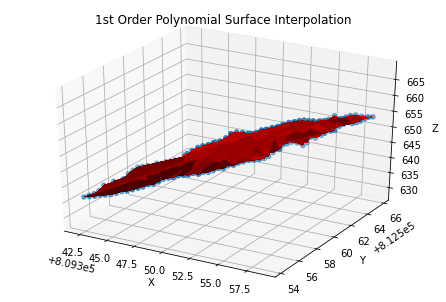

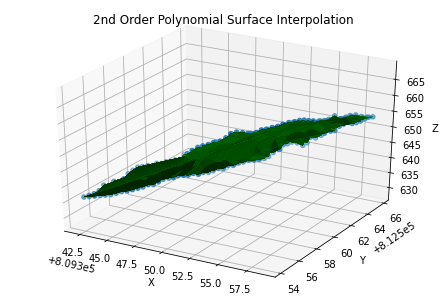

In [31]:
# read data
dataset = pd.read_csv('/content/out_xyz.csv') 
x = dataset['x'].values
y = dataset['y'].values
z = dataset['z'].values

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# 1st order polynomial surface interpolation
# create meshgrid
xi, yi = np.meshgrid(x, y)

# interpolate z values
z1 = griddata((x, y), z, (xi, yi), method='linear')

# plot 3d
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
ax.plot_surface(xi, yi, z1, alpha=0.5, color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y') 
ax.set_zlabel('Z')
plt.title('1st Order Polynomial Surface Interpolation')

# 2nd order polynomial surface interpolation
# create meshgrid
x2, y2 = np.meshgrid(x, y)

# interpolate z values
z2 = griddata((x, y), z, (x2, y2), method='cubic')

# plot 3d
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
ax.plot_surface(x2, y2, z2, alpha=0.5, color='green')
ax.set_xlabel('X')
ax.set_ylabel('Y') 
ax.set_zlabel('Z')
plt.title('2nd Order Polynomial Surface Interpolation')

plt.show()